# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from tasks.task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

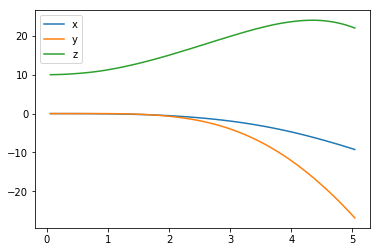

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

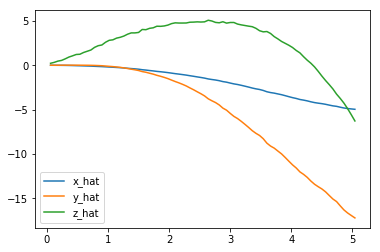

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

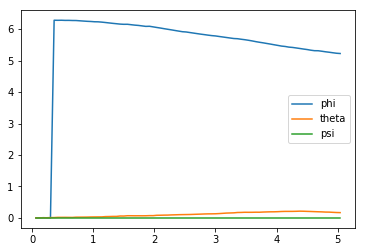

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

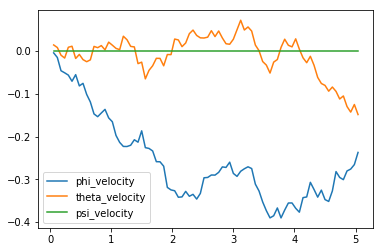

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

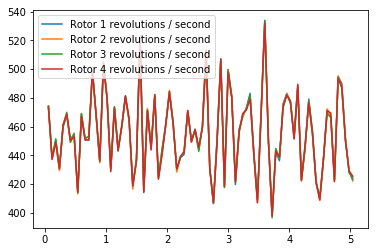

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -9.23970697 -26.83517201  22.00642372   5.22528933   0.16845326
   0.        ]
[ -4.96589683 -17.21258883  -6.28169569]
[-0.2370199  -0.14844483  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from tasks.task import Task

num_episodes = 100
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  100, score =  -0.279 (best =  -0.124), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [24]:
%reload_ext autoreload
%autoreload 2

## TODO: Train your agent here.
# takeoff reward function penalty 0.1 vs 0.001 previously
import sys
import pandas as pd
from agents.agent import Agent
from tasks.takeoff import Task # specify task file here 

num_episodes = 500
best_score = -100
worst_score = 100
# define initial and target positions for takeoff; initialized at None in Task class
# init_pos = np.array([0., 0., 10., 0., 0., 0.])
target_pos = np.array([0., 0., 100.])
task = Task(target_pos=target_pos)
agent = Agent(task) 

rewards = {}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        score += reward
        best_score = max(best_score, score)
        worst_score = min(worst_score, score)
             
        if done:
            print("\r{:d}. score: {:.3f} best: {:.3f} worst: {:.3f} pos: ({:.2f},{:.2f},{:.2f})".format(
                i_episode, 
                score, 
                best_score, 
                worst_score,
                task.sim.pose[0],
                task.sim.pose[1],
                task.sim.pose[2]))  # [debug]

            break

    rewards[i_episode] = score
    sys.stdout.flush()

1. score: 68.867 best: 68.867 worst: 2.163 pos: (-6.02,11.52,0.00)
2. score: 64.603 best: 68.867 worst: 2.163 pos: (-4.61,10.24,0.00)
3. score: 66.707 best: 68.867 worst: 2.163 pos: (-5.96,11.58,0.00)
4. score: 56.045 best: 68.867 worst: 2.163 pos: (-2.28,4.18,0.00)
5. score: 45.325 best: 68.867 worst: 2.163 pos: (-0.07,0.55,0.00)
6. score: 45.286 best: 68.867 worst: 2.163 pos: (4.29,-1.13,0.00)
7. score: 113.936 best: 113.936 worst: 2.163 pos: (9.85,0.01,0.00)
8. score: 75.439 best: 113.936 worst: 2.163 pos: (0.92,9.07,0.00)
9. score: 40.965 best: 113.936 worst: 2.163 pos: (1.02,-3.85,0.00)
10. score: 109.740 best: 113.936 worst: 2.163 pos: (-7.78,1.87,0.00)
11. score: 51.667 best: 113.936 worst: 2.163 pos: (9.30,-2.69,0.00)
12. score: 71.054 best: 113.936 worst: 2.163 pos: (0.60,2.46,0.00)
13. score: 49.546 best: 113.936 worst: 2.163 pos: (-2.08,8.81,0.00)
14. score: 53.829 best: 113.936 worst: 2.163 pos: (-8.50,-6.81,0.00)
15. score: 66.794 best: 113.936 worst: 2.163 pos: (-8.18,3.1

121. score: 83.965 best: 113.936 worst: 2.163 pos: (3.40,36.92,0.00)
122. score: 94.651 best: 113.936 worst: 2.163 pos: (1.70,59.90,0.00)
123. score: 53.623 best: 113.936 worst: 2.163 pos: (0.49,28.04,0.00)
124. score: 103.059 best: 113.936 worst: 2.163 pos: (-41.74,-4.12,0.00)
125. score: 38.784 best: 113.936 worst: 2.163 pos: (-0.19,-5.08,0.00)
126. score: 105.048 best: 113.936 worst: 2.163 pos: (-10.46,-7.48,0.00)
127. score: 99.274 best: 113.936 worst: 2.163 pos: (0.71,37.68,0.00)
128. score: 134.135 best: 134.135 worst: 2.163 pos: (128.17,150.00,282.11)
129. score: 25.887 best: 134.135 worst: 2.163 pos: (0.00,1.49,0.00)
130. score: 103.238 best: 134.135 worst: 2.163 pos: (-93.85,150.00,300.00)
131. score: 76.732 best: 134.135 worst: 2.163 pos: (-5.45,-37.83,0.00)
132. score: 92.103 best: 134.135 worst: 2.163 pos: (1.66,-117.54,300.00)
133. score: 159.557 best: 159.557 worst: 2.163 pos: (58.72,44.70,0.00)
134. score: 51.432 best: 159.557 worst: 2.163 pos: (0.07,30.42,0.00)
135. sco

237. score: 30.171 best: 178.887 worst: 2.163 pos: (-0.10,6.25,0.00)
238. score: 36.579 best: 178.887 worst: 2.163 pos: (0.09,14.82,0.00)
239. score: 38.706 best: 178.887 worst: 2.163 pos: (-0.18,16.64,0.00)
240. score: 30.166 best: 178.887 worst: 2.163 pos: (-0.18,6.03,0.00)
241. score: 30.164 best: 178.887 worst: 2.163 pos: (-0.01,-8.40,0.00)
242. score: 30.167 best: 178.887 worst: 2.163 pos: (0.05,-7.77,0.00)
243. score: 28.035 best: 178.887 worst: 2.163 pos: (-0.01,-4.94,0.00)
244. score: 28.038 best: 178.887 worst: 2.163 pos: (-0.07,-4.39,0.00)
245. score: 28.029 best: 178.887 worst: 2.163 pos: (-0.04,2.83,0.00)
246. score: 30.168 best: 178.887 worst: 2.163 pos: (-0.12,6.14,0.00)
247. score: 32.301 best: 178.887 worst: 2.163 pos: (-0.30,9.36,0.00)
248. score: 82.891 best: 178.887 worst: 2.163 pos: (0.16,65.91,0.00)
249. score: 36.567 best: 178.887 worst: 2.163 pos: (0.04,14.50,0.00)
250. score: 30.176 best: 178.887 worst: 2.163 pos: (-0.00,5.97,0.00)
251. score: 34.435 best: 178.8

352. score: 186.565 best: 187.192 worst: 2.163 pos: (8.82,-12.04,137.76)
353. score: 186.441 best: 187.192 worst: 2.163 pos: (7.99,21.98,141.49)
354. score: 186.273 best: 187.192 worst: 2.163 pos: (-26.29,11.89,134.61)
355. score: 184.933 best: 187.192 worst: 2.163 pos: (-71.17,4.21,134.36)
356. score: 185.658 best: 187.192 worst: 2.163 pos: (-63.32,-3.93,114.60)
357. score: 186.440 best: 187.192 worst: 2.163 pos: (9.90,-21.69,148.56)
358. score: 186.731 best: 187.192 worst: 2.163 pos: (-2.59,-17.71,137.00)
359. score: 186.545 best: 187.192 worst: 2.163 pos: (12.45,-7.26,156.03)
360. score: 186.125 best: 187.192 worst: 2.163 pos: (6.94,-32.95,142.25)
361. score: 186.550 best: 187.192 worst: 2.163 pos: (10.32,11.11,143.59)
362. score: 185.996 best: 187.192 worst: 2.163 pos: (24.38,17.49,136.51)
363. score: 186.508 best: 187.192 worst: 2.163 pos: (-9.33,-24.82,134.92)
364. score: 186.049 best: 187.192 worst: 2.163 pos: (-38.51,16.25,128.43)
365. score: 186.120 best: 187.192 worst: 2.163 

464. score: 185.898 best: 187.192 worst: 2.163 pos: (-17.10,-32.28,132.15)
465. score: 185.973 best: 187.192 worst: 2.163 pos: (-43.67,-5.27,136.22)
466. score: 186.714 best: 187.192 worst: 2.163 pos: (11.10,-8.06,157.77)
467. score: 185.623 best: 187.192 worst: 2.163 pos: (26.49,-45.20,151.01)
468. score: 185.734 best: 187.192 worst: 2.163 pos: (-56.22,2.81,120.93)
469. score: 185.671 best: 187.192 worst: 2.163 pos: (-59.00,-3.39,123.18)
470. score: 186.346 best: 187.192 worst: 2.163 pos: (-15.24,13.19,152.91)
471. score: 186.258 best: 187.192 worst: 2.163 pos: (-3.37,-39.72,130.06)
472. score: 185.850 best: 187.192 worst: 2.163 pos: (23.91,-26.65,159.27)
473. score: 186.783 best: 187.192 worst: 2.163 pos: (-17.68,-0.79,136.94)
474. score: 187.010 best: 187.192 worst: 2.163 pos: (2.64,8.94,145.48)
475. score: 186.940 best: 187.192 worst: 2.163 pos: (-1.06,-1.44,142.42)
476. score: 186.490 best: 187.192 worst: 2.163 pos: (13.76,-20.76,137.27)
477. score: 186.711 best: 187.192 worst: 2.

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [25]:
# rewards

In [26]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline
import re
from datetime import datetime

title = ''.join(str(datetime.now()).split(':')[:-1])
timestamp = re.sub(r'[- ]','',title)
memo = 'layer2-600'

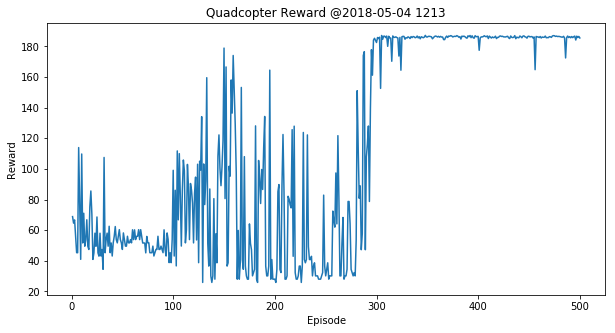

In [27]:
lists = sorted(rewards.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.title("Quadcopter Reward @{}".format(title))
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.savefig('../charts/{}-{}'.format(timestamp,memo))
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:  I chose to train the takeoff function, where the [x,y,z] training is based on achieving target coordinates of [0,0,100], representing a liftoff of 100, from an initial position of [0,0,10].  The reward function is: 

`reward = tanh(1 - 0.001*((abs(current position[x,y,z] - target position[x,y,z]).sum())`

Effectively, the drone receives a reward of 1 in each step of each episode less a penalty based on the distance between its current location and the target location.  The distance is captured as the sum of the difference between each x,y,z parameter in current vs. target position.    

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: The Deep Q Learning algorithm was used in this model. I implemented an actor/critic neural network primarily influenced by the architecture outlined in the Deep Deterministic Policy Gradients (DDPG) paper [here](https://arxiv.org/abs/1509.02971) and Keras implementation [here](https://github.com/yanpanlau/DDPG-Keras-Torcs).The Actor NN consists of two layers of 400 and 600, l2 regularizer of 0.01, batch normalization and relu activation with Adam optimizer and learning rate 0.0001.  Critic NN consisted of two layers of 400 and 600, l2 regularizer of 0.01, batch normalization, relu/linear activations and Adam optimizer with learning rate 0.001. Final layer weights and biases of both actor and critic were initialized from uniform distribution [-3e-3,3e-3]. Discount rate/gamma of 0.99 used to provide a slight preference for rewards earned now vs in the future. Regularizers and initializers were used in order to prevent vanishing and exploding gradients.  

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: It seems that the drone would sporadically achieve high rewards for a period of time and then stumble back, but once again finding its feet at a later time.  This is due to the explore vs exploit stochastic/probabilistic nature of the learning algorithm, where there is a slight probability that the drone explores new decisions vs sticking solely with the decision which results in maximum known reward. To capture this, the Ornstein-Uhlenbeck process is incorporated into the model, with theta and sigma of 0.15 and 0.2, respectively.  These capture the probability that the model will explore rather than exploit.  It appears that the learning curve is littered with "aha moments", but with gradual improvement in average reward over time.  In the specific case above, there was one major 'aha moment' around episode 300, but in trying various architectures the cliff isn't typically so clearly defined.  

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: This was a very challenging project.  There is a great deal of code which needs to be digested and then modified to perform a specific task.  It would have been helpful if there were more resources available pertaining to guidance in creating different tasks, and workable models around those tasks.  I do find it interesting how the learning process is more inclined to have periodic large increases in reward, which seems to represent that it is based more on 'aha moments' than on a gradual increase, although looked at most of the modelling from a longer perspective you can definitely see a gradual improvement in learning.  This is however a fascinating use case and, time permitting, would love to incorporate this into a 3D simulator and try a variety of tasks and applications (such as additional work with OpenAI gym).  